## Climate Dataset of the city of Delhi

In [10]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV,TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.base import  BaseEstimator,RegressorMixin

## Introduction
In this task, the focus is on time series forecasting, specifically targeting the prediction of the current **mean temperature** in the city of Delhi. Your task involves employing bagging and boosting methods to forecast the **mean temperature**. To accomplish this use data from the preceding three days, consisting of **mean temperature**, **humidity**, **wind speed**, and **mean pressure**.


## Exploring the Climate Dataset
This dataset consists of daily weather records for the city of Delhi spanning a period of 4 years (from 2013 to 2017). The dataset includes the following attributes:

- date - date in the format YYYY-MM-DD,
- meantemp - mean temperature averaged from multiple 3-hour intervals in a day,
- humidity - humidity value for the day (measured in grams of water vapor per cubic meter volume of air),
- wind_speed - wind speed measured in kilometers per hour, and
- meanpressure - pressure reading of the weather (measured in atm).

*Note: The dataset is complete, with no missing values in any of its entries.*

In [11]:
dataset = pd.read_csv("data/climate-data.csv")
dataset

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000


In [12]:
dataset['date'] = pd.to_datetime(dataset['date'])
dataset = dataset.sort_values(by='date')
dataset.set_index('date', inplace=True)

In [13]:
dataset

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...
2016-12-28,17.217391,68.043478,3.547826,1015.565217
2016-12-29,15.238095,87.857143,6.000000,1016.904762
2016-12-30,14.095238,89.666667,6.266667,1017.904762


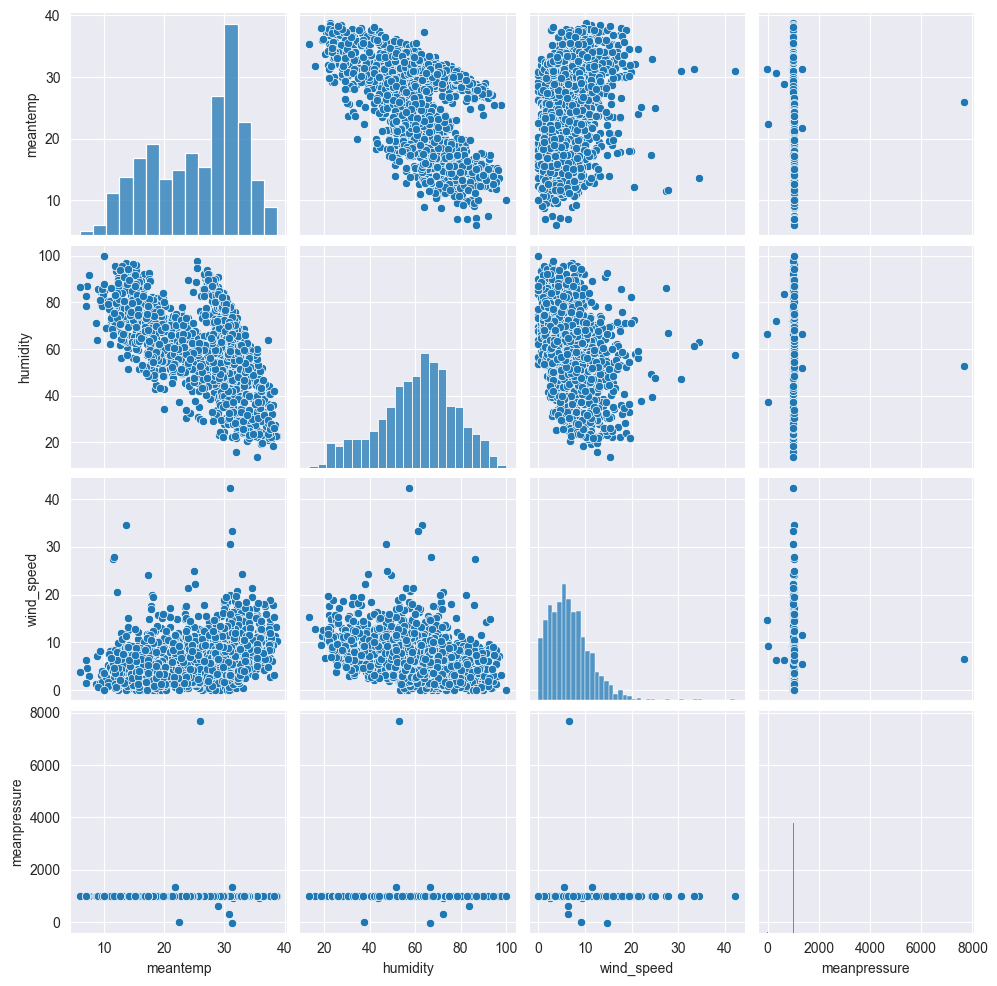

In [14]:
sns.pairplot(dataset)

<Axes: >

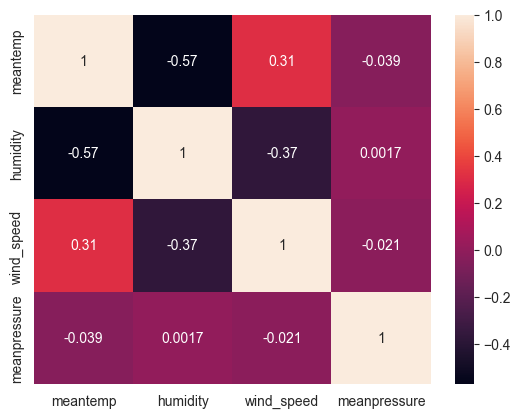

In [15]:
sns.heatmap(dataset.corr(),annot=True)

In [16]:
columns = dataset.columns
for i in range(1,4):
    for col in columns:
        dataset[f'{col}_shift_-{i}'] = dataset[col].shift(i)

dataset.dropna(inplace=True)

In [17]:
dataset

,meantemp,humidity,wind_speed,meanpressure,meantemp_shift_-1,humidity_shift_-1,wind_speed_shift_-1,meanpressure_shift_-1,meantemp_shift_-2,humidity_shift_-2,wind_speed_shift_-2,meanpressure_shift_-2,meantemp_shift_-3,humidity_shift_-3,wind_speed_shift_-3,meanpressure_shift_-3
date,,,,,,,,,,,,,,,,
2013-01-04,8.666667,71.333333,1.233333,1017.166667,7.166667,87.000000,4.633333,1018.666667,7.400000,92.000000,2.980000,1017.800000,10.000000,84.500000,0.000000,1015.666667
2013-01-05,6.000000,86.833333,3.700000,1016.500000,8.666667,71.333333,1.233333,1017.166667,7.166667,87.000000,4.633333,1018.666667,7.400000,92.000000,2.980000,1017.800000
2013-01-06,7.000000,82.800000,1.480000,1018.000000,6.000000,86.833333,3.700000,1016.500000,8.666667,71.333333,1.233333,1017.166667,7.166667,87.000000,4.633333,1018.666667
2013-01-07,7.000000,78.600000,6.300000,1020.000000,7.000000,82.800000,1.480000,1018.000000,6.000000,86.833333,3.700000,1016.500000,8.666667,71.333333,1.233333,1017.166667
2013-01-08,8.857143,63.714286,7.142857,1018.714286,7.000000,78.600000,6.300000,1020.000000,7.000000,82.800000,1.480000,1018.000000,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-28,17.217391,68.043478,3.547826,1015.565217,16.850000,67.550000,8.335000,1017.200000,17.142857,74.857143,8.784211,1016.952381,14.000000,94.300000,9.085000,1014.350000
2016-12-29,15.238095,87.857143,6.000000,1016.904762,17.217391,68.043478,3.547826,1015.565217,16.850000,67.550000,8.335000,1017.200000,17.142857,74.857143,8.784211,1016.952381
2016-12-30,14.095238,89.666667,6.266667,1017.904762,15.238095,87.857143,6.000000,1016.904762,17.217391,68.043478,3.547826,1015.565217,16.850000,67.550000,8.335000,1017.200000


## Training

In [18]:
X,y = dataset.drop(columns=['meantemp'],axis=1),dataset['meantemp']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,shuffle=False)

## Ensemble Learning Methods

### Bagging

In [19]:
model_1 = RandomForestRegressor()
model_1.fit(X_train,y_train)

RandomForestRegressor()

In [20]:
preds = model_1.predict(X_test)

In [21]:
print(f'Mean square error: {mean_squared_error(y_test,preds)}')
print(f'R2 score: {r2_score(y_test,preds)}')

Mean square error: 2.0763591125756125
R2 score: 0.9351776396089485


### Boosting

In [22]:
class XGBWrapper(BaseEstimator,RegressorMixin):
    def __init__(self,**kwargs):
        self.params = kwargs
        self.model = XGBRegressor(**kwargs)
    
    def fit(self,X,y):
        self.model = XGBRegressor(**self.params)
        self.model.fit(X,y)
        return self
    
    def predict(self,X):
        return self.model.predict(X)
    
    def set_params(self, **params):
        self.params.update(**params)
        return self
    def get_params(self, deep=True):
        return self.params

In [26]:
model_2 = XGBWrapper()
model_2.fit(X_train,y_train)

XGBWrapper()

In [27]:
preds = model_2.predict(X_test)

In [28]:
print(f'Mean square error: {mean_squared_error(y_test,preds)}')
print(f'R2 score: {r2_score(y_test,preds)}')

Mean square error: 2.2491627687242532
R2 score: 0.9297828402180744


## FineTuning with XGBoost

In [29]:
tcvs = TimeSeriesSplit(n_splits=5)
params = {'n_estimators':[40,50,80,100,150],
          'max_depth':[3,4,5,6,7],}
grid = GridSearchCV(estimator=XGBWrapper(),param_grid=params,cv=tcvs,scoring='neg_mean_squared_error')
grid.fit(X_train,y_train)

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=XGBWrapper(),
             param_grid={'max_depth': [3, 4, 5, 6, 7],
                         'n_estimators': [40, 50, 80, 100, 150]},
             scoring='neg_mean_squared_error')

In [30]:
best_model = grid.best_estimator_
best_model.fit(X_train,y_train)
preds = best_model.predict(X_test)
print(f'Mean square error: {mean_squared_error(y_test,preds)}')
print(f'R2 score: {r2_score(y_test,preds)}')

Mean square error: 2.152324085526485
R2 score: 0.9328060706332862
